In [2]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
import cartopy.crs as ccrs
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int
from utils import u_plot as uplot
import glob

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [1]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [3]:
gpm_folder = cnst.network_data + 'data/OBS/IMERG_HQ_precip_old/'

In [10]:
mcs_folder = cnst.network_data + 'MCSfiles/WA5000_4-8N_12W-12E_-50_afternoon_GPM_old/'

In [4]:
flist = glob.glob(gpm_folder+'*/*/*.2005*.nc4')

In [5]:
flist

['/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050129-0430.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050105-0130.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050122-0930.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050112-2200.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050110-1700.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050122-0000.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050121-2300.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050120-0730.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_precip_old/2005/01/3B-HHR.MS.MRG.3IMERG.V06A.20050112-1800.nc4',
 '/home/ck/DIR/cornkle/data/OBS/IMERG_HQ_preci

In [9]:
bla = xr.open_dataset(flist[0])
bla = bla['HQprecipitation'].squeeze()
bla = bla.T
grid = u_grid.make(bla['lon'].values, bla['lat'].values, 5000)

grid_lons, grid_lats = np.meshgrid(bla['lon'].values, bla['lat'].values)
inds, weights, shape = u_int.interpolation_weights_grid(grid_lons,grid_lats , grid)

lon, lat = grid.ll_coordinates

In [10]:
years = np.arange(2001,2011)

In [11]:
def pickyear(y):
    print('Doing '+ str(y))
    flist = glob.glob(gpm_folder+'*/*/*.'+str(y)+'*.nc4')
    mf = xr.open_mfdataset(flist, autoclose=True)
    mf = mf.sel(lon=slice(-10,10))
    mask = (mf['time.hour'] >=17) & (mf['time.hour'] <=19)
    mf = mf.isel(time=mask)
    month =  mf.groupby('time.month').max(dim=['time'])#.load()
    return month

In [12]:
for ids, y in enumerate(years):
    month = pickyear(y)
    if ids == 0:
        summ = month
    else:
        summ += month

Doing 2001


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2002


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2003


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2004


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2005


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2006


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2007


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2008


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2009


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

Doing 2010


/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:900: FutureWarning: The autoclose argument is no longer used by xarray.open_dataset() and is now ignored; it will be removed in a future version of xarray. If necessary, you can control the maximum number of simultaneous open files with xarray.set_options(file_cache_maxsize=...).
  datasets = [open_(p, **open_kwargs) for p in paths]
/home/ck/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  after removing the cwd from sys.path.
/home/ck/miniconda3/lib/python3.7/site-packages/xarray/backends/api.py:933: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` functio

In [12]:
def pickyear(y):
    print('Doing '+ str(y))
    flist = glob.glob(gpm_folder+'*/*/*.'+str(y)+'*.nc4')
    mf = xr.open_mfdataset(flist, autoclose=True)
    mf = mf.sel(lon=slice(-10,10))
    mask = (mf['time.hour'] >=17) & (mf['time.hour'] <=19)
    mf = mf.isel(time=mask)
    month =  mf.groupby('time.month').max(dim=['time','lon'])#.load()
    return month

In [13]:
years = np.arange(2001,2011)

In [14]:
for ids, y in enumerate(years):
    month = pickyear(y)
    if ids == 0:
        summ = month
    else:
        summ += month

Doing 2001
Doing 2002
Doing 2003
Doing 2004
Doing 2005
Doing 2006
Doing 2007
Doing 2008
Doing 2009
Doing 2010


In [15]:
summ

<xarray.Dataset>
Dimensions:            (lat: 141, month: 12)
Coordinates:
  * lat                (lat) float32 3.95 4.05 4.15 4.25 ... 17.75 17.85 17.95
  * month              (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    HQprecipSource     (month, lat) float32 dask.array<shape=(12, 141), chunksize=(1, 141)>
    HQprecipitation    (month, lat) float32 dask.array<shape=(12, 141), chunksize=(1, 141)>
    HQobservationTime  (month, lat) timedelta64[ns] dask.array<shape=(12, 141), chunksize=(1, 141)>

In [16]:
out = summ/10

In [17]:
out['HQprecipitation'].shape

(12, 141)

In [18]:
prcp = out['HQprecipitation'].load()

/home/ck/miniconda3/lib/python3.5/site-packages/dask/compatibility.py:93: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/home/ck/miniconda3/lib/python3.5/site-packages/toolz/functoolz.py:468: RuntimeWarning: All-NaN slice encountered
  ret = f(ret)


In [19]:
prcp

<xarray.DataArray 'HQprecipitation' (month: 12, lat: 141)>
array([[30.814001, 33.857998, 33.627003, ...,  3.866   ,  3.699   ,  2.828   ],
       [43.801   , 52.676003, 48.752   , ...,  2.643   ,  2.928   ,  2.78    ],
       [51.125004, 49.252003, 43.957996, ...,  2.35    ,  3.446   ,  3.383   ],
       ...,
       [41.838997, 41.715004, 37.045002, ..., 13.991   , 16.269001, 17.833   ],
       [39.651997, 48.604996, 49.783   , ...,  0.879   ,  0.841   ,  1.062   ],
       [41.091003, 35.743   , 37.913002, ...,  1.022   ,  1.891   ,  1.72    ]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 3.95 4.05 4.15 4.25 4.35 ... 17.65 17.75 17.85 17.95
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

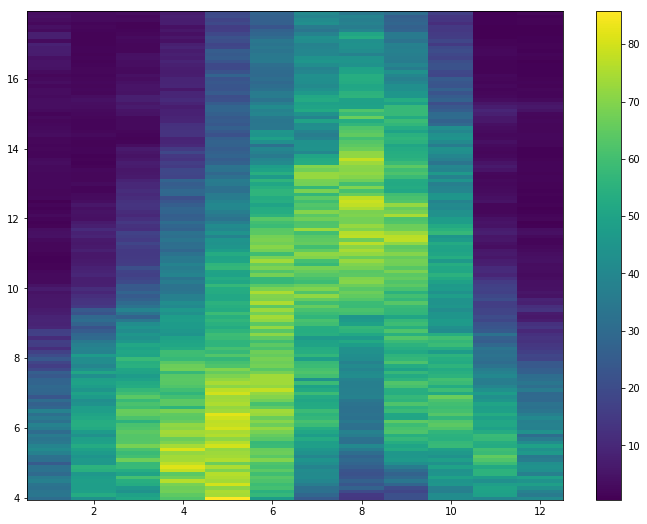

In [20]:
plt.figure(figsize=(12,9))
plt.pcolormesh(np.arange(0.5,13.5,1),prcp.lat, prcp.T)
plt.colorbar()

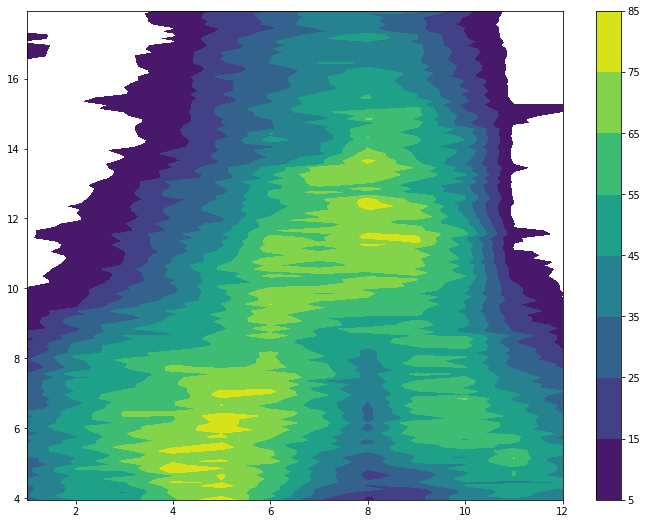

In [26]:
plt.figure(figsize=(12,9))
plt.contourf(np.arange(1,13,1),prcp.lat, prcp.T, levels=[5,15,25,35,45,55,65,75,85])
plt.colorbar()
prcp.to_netcdf('/home/ck/DIR/cornkle/figs/CLOVER/maxRain_hov_GPM.nc')

In [54]:
## a clean way of plotting - use matplotlib functions directly:

def draw_map(ax, data, lon, lat, l1, l2, nb,title=None,  text=None, mask_sig=None, quiver=None, contour=None, contour2=None, cbar_label=None,cmap=None):
    #mapp = ax.contourf(lon, lat, data, **kwargs)  # this is the actual plot
    nb_lev = nb
    cmapp = uplot.discrete_cmap(nb_lev, base_cmap=cmap)

#     mapp = ax.pcolormesh(np.arange(0.5,13,1), lat,data
#                           ,cmap=cmapp, vmin=l1, vmax=l2)
    
    mapp = ax.contourf(np.arange(1,13,1), lat,data, levels=np.round(np.linspace(l1,l2,nb),1), cmap=cmap )

    #cbar = plt.colorbar(mapp, ticks=np.linspace(l1,l2,nb_lev+1))
    cbar = plt.colorbar(mapp)
    plt.title(title)
    plt.text(0.03,0.85, text, transform=ax.transAxes, fontsize=14)
    ax.axhline(8.5, linestyle='dashed')
    
    ## mask for significance indicator
    if mask_sig is not None:
         plt.pcolormesh(lon, lat, mask_sig, colors='none', hatches='.',
                     levels=[0.5, 1], linewidth=0.1)
    
    ## quiver list
    if quiver is not None:
        qu = ax.quiver(quiver['x'], quiver['y'], quiver['u'], quiver['v'], scale=quiver['scale'])
    ## additional contour on plot   
    if contour is not None:
        cs = ax.contour(contour['x'], contour['y'], contour['data'], levels=contour['levels'], cmap=contour['cmap'] )
        plt.clabel(cs, inline=1, fontsize=8, fmt="%1.1f")
        
    if contour2 is not None:
        cs = ax.contour(contour2['x'], contour2['y'], contour2['data'], levels=contour2['levels'], colors=contour2['color'], linewidths=0.5 )
        plt.clabel(cs, inline=1, fontsize=8, fmt="%1.1f")
    
#     ax.coastlines()   ## adds coastlines
#     # Gridlines
#     xl = ax.gridlines(draw_labels=True);   # adds latlon grid lines
#     xl.xlabels_top = False   ## labels off
#     xl.ylabels_right = False
#     plt.title(title)
#     # Countries
#     ax.add_feature(cartopy.feature.BORDERS, linestyle='--'); # adds country borders
   # cbar = plt.colorbar(mapp)  # adds colorbar
    cbar.set_label(cbar_label)   

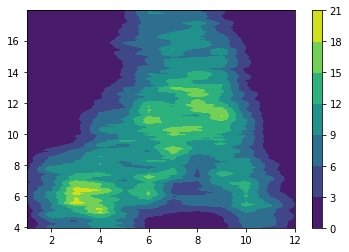

In [64]:
plt.contourf(np.arange(1,13,1),means.lat.values,means['HQprecipitation'].values.T[:,0:-1])
plt.colorbar()

In [60]:
np.arange(1,14,1).shape

(13,)

TypeError: Length of x must be number of columns in z.

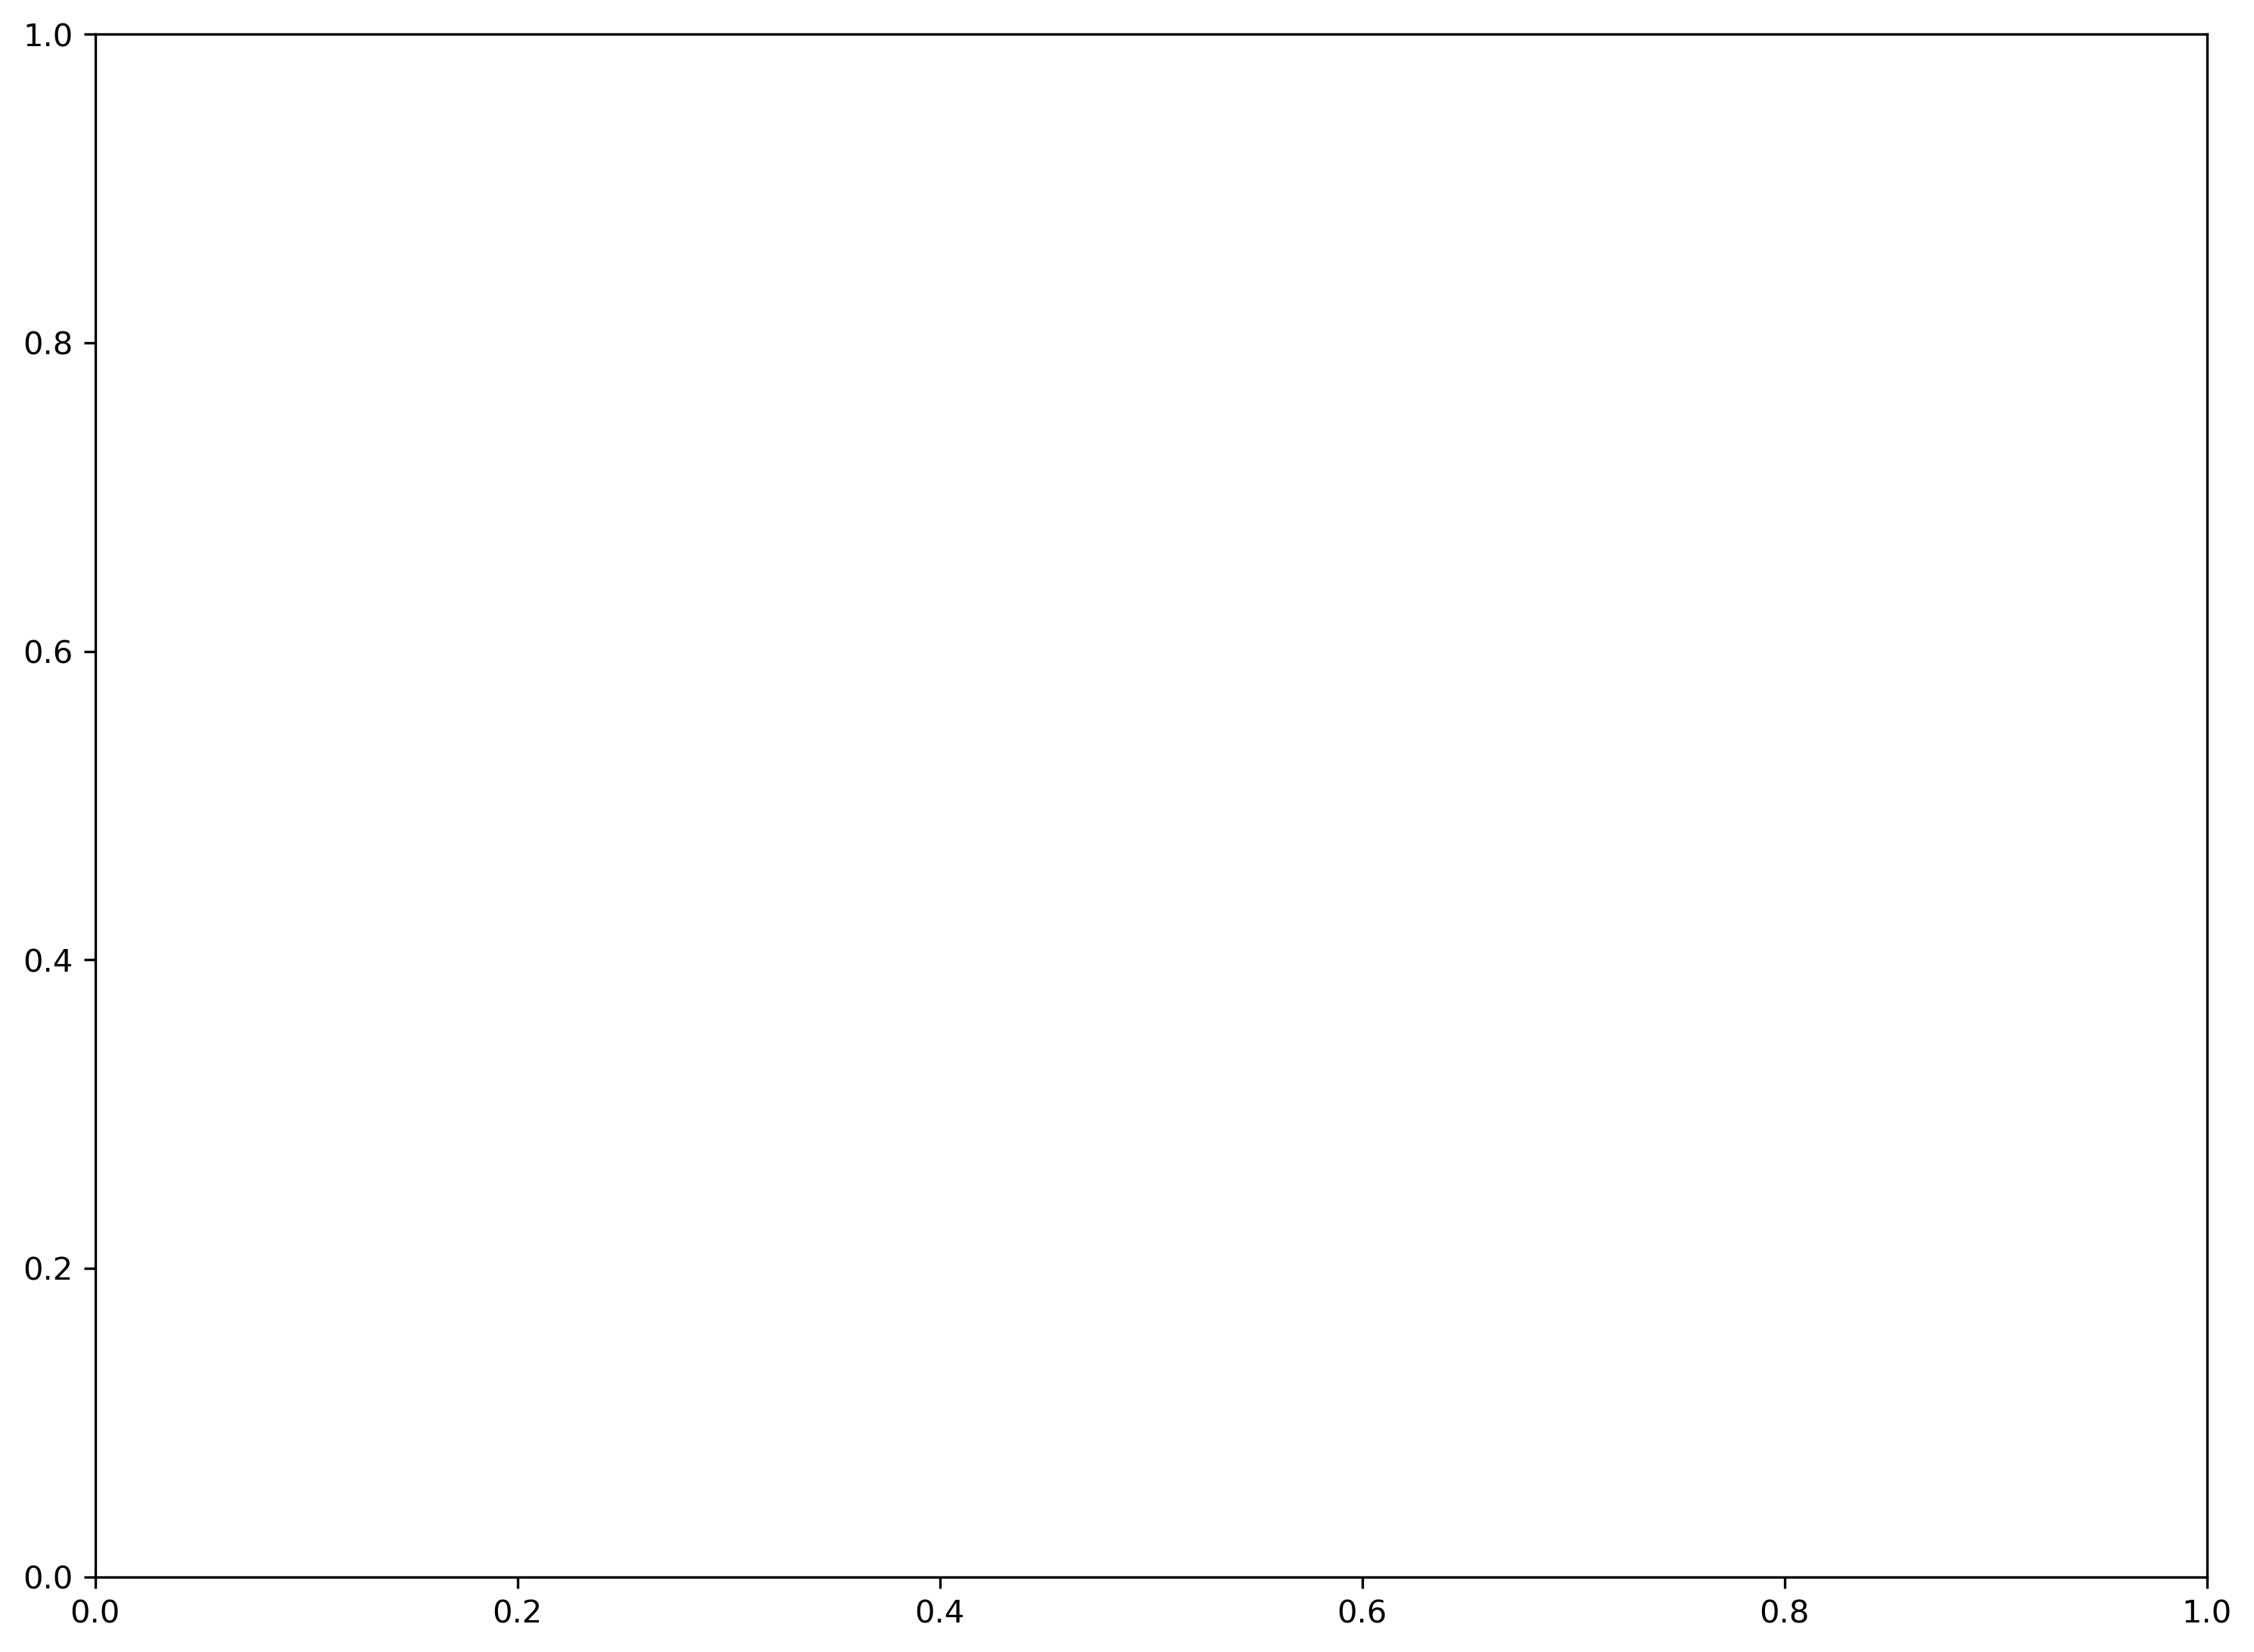

In [56]:
f = plt.figure(figsize=(12,9), dpi=300)
ax = f.add_subplot(111)
draw_map(ax,means['HQprecipitation'].values.T , np.arange(1,14,1), means.lat.values, 20, 370,15, cmap='Blues',  \
         title='Precipitation ', text='(a)', cbar_label='mm day$^{-1}$')
# draw_map(ax, mean.values.T, mean.month, mean.lat, -68, -60, 10, cmap='Blues_r',  \
#          title=r"Average MCS temperature | $\Delta \theta_e$", text='(b)', contour2=contour2, cbar_label='K')